# Blds indicators

Question: Exists any relation between the Microsoft AI buildings and selected indicators?

#### Import libs

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import numpy as np


import geopandas as gpd
import numpy as np
import libpysal as lp

c:\Users\milan\general_py_venv\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
c:\Users\milan\general_py_venv\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
c:\Users\milan\general_py_venv\lib\site-packages\libpysal\cg\alph

#### Load Microsoft AI buildings data by region

In [2]:
# get the directory with downloaded data
os.chdir("..")
home_dir = os.getcwd()
data_dir = os.path.join(home_dir, "downloaded-data-json")


In [3]:
def get_json_names():

    """
    Get the names of the json files in the downloaded-data-json directory
    """

    home_dir = os.getcwd()
    json_dir = os.path.join(home_dir, f"downloaded-data-json", "")

    # Construct the file pattern
    file_pattern = os.path.join(json_dir, '*.json')
    # print(file_pattern)

    # Use glob to get the list of file names matching the pattern
    file_names = glob.glob(file_pattern)
    # print(file_names)

    # Extract the base names of the files without the extension
    names = [os.path.splitext(os.path.basename(file_name))[0]
            for file_name in file_names]
    # print(names)
    
    # Print the names
    return names
    

json_names = get_json_names()
json_names


['blds_africa_states_18-23_ai',
 'blds_continent_data_18-23_ai',
 'blds_northamerica_states_18-23_ai',
 'blds_sel-states',
 'blds_world_states_18-23_ai',
 'roads_africa_states_18-23_ai',
 'roads_asia_states_18-23_ai',
 'roads_continent_data_18-23_ai',
 'roads_europe_states_18-23_ai',
 'roads_geojson-world-states',
 'roads_world-states_18-21']

In [4]:
json_dic = {k: v for k, v in enumerate(json_names)}
json_dic


{0: 'blds_africa_states_18-23_ai',
 1: 'blds_continent_data_18-23_ai',
 2: 'blds_northamerica_states_18-23_ai',
 3: 'blds_sel-states',
 4: 'blds_world_states_18-23_ai',
 5: 'roads_africa_states_18-23_ai',
 6: 'roads_asia_states_18-23_ai',
 7: 'roads_continent_data_18-23_ai',
 8: 'roads_europe_states_18-23_ai',
 9: 'roads_geojson-world-states',
 10: 'roads_world-states_18-21'}

In [5]:
# define the user input

while True:
    if bool(json_dic):
        try:
            user_d_spec = int(input(f"Which data do you want to process?\
                                Enter {json_dic}"
                                    ))
        except ValueError:
            print("Please enter a number.")
            continue
        if user_d_spec not in range(len(json_dic)):
            print(f"Please enter {len(json_dic.keys())}")
            continue
        break
    else:
        print("Geojson_dic is empty, restart the kernel, please.")
        break



In [6]:
def data_spec(data_dic):

    """
    Load the data from the json file
    """

    try:
        with open(f"downloaded-data-json\\{data_dic}.json", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")

data = data_spec(json_dic[user_d_spec])
data


[[{'groupByObject': ['Indonesia',
    'remainder',
    'IDN',
    'Indonesia',
    'Sovereign country',
    'Indonesia',
    'Indonesia',
    'Indonesia',
    1159320845,
    270625568.0,
    17,
    2019,
    1119190,
    2019,
    '4. Emerging region: MIKT',
    '4. Lower middle income',
    'Asia',
    'Asia',
    'South-Eastern Asia',
    'East Asia & Pacific'],
   'result': [{'timestamp': '2018-01-01T00:00:00Z', 'value': 11987966.0},
    {'timestamp': '2019-01-01T00:00:00Z', 'value': 24924151.0},
    {'timestamp': '2020-01-01T00:00:00Z', 'value': 26423299.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 30570946.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 36251876.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 38586511.0}]},
  {'groupByObject': ['Indonesia',
    'source=microsoft/BuildingFootprints',
    'IDN',
    'Indonesia',
    'Sovereign country',
    'Indonesia',
    'Indonesia',
    'Indonesia',
    1159320845,
    270625568.0,
    17,
    2019,
   

In [7]:
# get the header properties
header_properties = ["name_en", "source", "adm0_iso", "sovereignt", "type_", "admin", "geounit", "name", "ne_id", "pop_est",
                     "pop_rank", "pop_year", "gdp_md", "gdp_year", "economy", "income_grp", "continent", "region_un", "subregion", "region_wb",
                     "timestamp", "value"]

# create a dictionary with the header properties
d = {k: list() for k in header_properties}
d

{'name_en': [],
 'source': [],
 'adm0_iso': [],
 'sovereignt': [],
 'type_': [],
 'admin': [],
 'geounit': [],
 'name': [],
 'ne_id': [],
 'pop_est': [],
 'pop_rank': [],
 'pop_year': [],
 'gdp_md': [],
 'gdp_year': [],
 'economy': [],
 'income_grp': [],
 'continent': [],
 'region_un': [],
 'subregion': [],
 'region_wb': [],
 'timestamp': [],
 'value': []}

In [8]:
"""
In this modified code, we check the length of the current list (d[key])
 against the length of the "timestamp" list (d["timestamp"]).
 If the current list is longer, we append the corresponding "timestamp"
 and "value" to ensure they have the same length. If the current list is shorter,
 we update the value at the corresponding index in the "timestamp" and "value" lists
 instead of appending new elements.
 
"""

for region in data:
    temp_dic = {}
    temp_keys = header_properties[0:-2]

    for dic in region:
        for idx, key in enumerate(temp_keys):
            temp_dic[key] = dic["groupByObject"][idx]

            for res in dic["result"]:
                if key not in d:
                    d[key] = []

                d[key].append(temp_dic[key])

                if len(d[key]) > len(d["timestamp"]):
                    d["timestamp"].append(res["timestamp"])
                    d["value"].append(res["value"])
                else:
                    d["timestamp"][len(d[key])-1] = res["timestamp"]
                    d["value"][len(d[key])-1] = res["value"]

df = pd.DataFrame(d)

In [9]:
# convert the timestamp to datetime
df["blds_year"] = pd.to_datetime(df["timestamp"]).dt.year

# rename the value column to num_of_blds
df.rename(columns={"value": "num_of_blds"}, inplace=True)

In [10]:
# check the data types
df.dtypes

name_en         object
source          object
adm0_iso        object
sovereignt      object
type_           object
admin           object
geounit         object
name            object
ne_id            int64
pop_est        float64
pop_rank         int64
pop_year         int64
gdp_md           int64
gdp_year         int64
economy         object
income_grp      object
continent       object
region_un       object
subregion       object
region_wb       object
timestamp       object
num_of_blds    float64
blds_year        int32
dtype: object

In [11]:
# list the column names
df.columns

Index(['name_en', 'source', 'adm0_iso', 'sovereignt', 'type_', 'admin',
       'geounit', 'name', 'ne_id', 'pop_est', 'pop_rank', 'pop_year', 'gdp_md',
       'gdp_year', 'economy', 'income_grp', 'continent', 'region_un',
       'subregion', 'region_wb', 'timestamp', 'num_of_blds', 'blds_year'],
      dtype='object')

In [12]:
# view all rows of the dataframe
pd.reset_option('display.max_rows')

In [13]:
# check for missing values
df.loc[:, ["name_en", "blds_year", "num_of_blds"]].isna().sum()

name_en        0
blds_year      0
num_of_blds    0
dtype: int64

In [14]:
# DF with selected columns
df_blds_sel = df.loc[:, ["name_en", "adm0_iso", "blds_year", "source", "num_of_blds"]]
df_blds_sel

,name_en,adm0_iso,blds_year,source,num_of_blds
0,Indonesia,IDN,2018,remainder,11987966.0
1,Indonesia,IDN,2019,remainder,24924151.0
2,Indonesia,IDN,2020,remainder,26423299.0
3,Indonesia,IDN,2021,remainder,30570946.0
4,Indonesia,IDN,2022,remainder,36251876.0
...,...,...,...,...,...
3727,Scarborough Shoal,-99,2019,source=esri/Google_Africa_Buildings,0.0
3728,Scarborough Shoal,-99,2020,source=esri/Google_Africa_Buildings,0.0
3729,Scarborough Shoal,-99,2021,source=esri/Google_Africa_Buildings,0.0
3730,Scarborough Shoal,-99,2022,source=esri/Google_Africa_Buildings,0.0


In [15]:
# numbers of buildings by source
df_blds_sel[['source']].value_counts()

source                             
source=esri/Google_Africa_Buildings    1254
source=microsoft/BuildingFootprints    1254
remainder                              1224
Name: count, dtype: int64

#### Load indicators data (e.g. HDI, GDP)

In [16]:
# read the folder with indicators data
indicators_data_dir = os.path.join(home_dir, "indicators-data")

In [17]:
# read the gdp data and select relevant columns
gdp = pd.read_excel(f"{indicators_data_dir}\\gdp_world_countries_timeseries.xls", sheet_name="Data", skiprows=3)

# select relevant columns from the gdp data
gdp = gdp.loc[:, ["Country Name", "Country Code", "2018", "2019", "2020", "2021", "2022"]]
gdp

,Country Name,Country Code,2018,2019,2020,2021,2022
0,Aruba,ABW,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819
1,Africa Eastern and Southern,AFE,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829
2,Afghanistan,AFG,492.090632,497.741429,512.055098,355.777826,NaN
3,Africa Western and Central,AFW,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219
4,Angola,AGO,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231
...,...,...,...,...,...,...,...
261,Kosovo,XKX,4384.188680,4416.029253,4310.934002,5269.783901,5340.268798
262,"Yemen, Rep.",YEM,701.714868,693.816503,578.512010,543.637538,650.272218
263,South Africa,ZAF,7067.724165,6702.526617,5753.066494,7073.612754,6766.481254
264,Zambia,ZMB,1475.199883,1268.120941,956.831729,1134.713454,1456.901570


In [18]:
# read the hdi data and select relevant columns
hdi = pd.read_excel(f"{indicators_data_dir}\\hdi_world_countries_timeseries.xlsx")

# cols to select
hdi_cols_sel = ['iso3', 'country', 'hdicode', 'region', 'hdi_2018', 'hdi_2019', 'hdi_2020', 'hdi_2021']

# select the columns
hdi = hdi.loc[:, hdi_cols_sel]

hdi

,iso3,country,hdicode,region,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,AFG,Afghanistan,Low,SA,0.483,0.488,0.483,0.478
1,AGO,Angola,Medium,SSA,0.595,0.595,0.590,0.586
2,ALB,Albania,High,ECA,0.806,0.810,0.794,0.796
3,AND,Andorra,Very High,NaN,0.872,0.873,0.848,0.858
4,ARE,United Arab Emirates,Very High,AS,0.909,0.920,0.912,0.911
...,...,...,...,...,...,...,...,...
201,ZZG.ECA,Europe and Central Asia,NaN,NaN,0.798,0.802,0.793,0.796
202,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,0.766,0.768,0.755,0.754
203,ZZI.SA,South Asia,NaN,NaN,0.640,0.641,0.638,0.632
204,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,0.547,0.552,0.549,0.547


### Buildings X GDP

#### 1. version of the scatterplot (GDP)
- one year of the data (2022)
- x-axis: Microsoft AI buildings
- y-axis: selected indicator

##### Transform the data

In [19]:
# select the gdp data from the year 2022 and create the df
gdp_2022 = gdp[['Country Name', 'Country Code', '2022']]
gdp_2022

,Country Name,Country Code,2022
0,Aruba,ABW,33300.838819
1,Africa Eastern and Southern,AFE,1644.062829
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,1785.312219
4,Angola,AGO,3000.444231
...,...,...,...
261,Kosovo,XKX,5340.268798
262,"Yemen, Rep.",YEM,650.272218
263,South Africa,ZAF,6766.481254
264,Zambia,ZMB,1456.901570


In [20]:
# select the ai blds data from the year 2022 and create the df
ai_blds_2022 = df_blds_sel.loc[(df_blds_sel['blds_year'] == 2022)
           & (df_blds_sel['source'] == "source=microsoft/BuildingFootprints")
           & ~(df_blds_sel['adm0_iso'] == 'USA') # exclude USA as a extreme value
           , :]

In [21]:
# check the number of buildings by country in the year 2022
ai_blds_2022.groupby(['name_en', 'adm0_iso']).agg({'num_of_blds': 'sum'}).reset_index()

,name_en,adm0_iso,num_of_blds
0,Abkhazia,GEO,0.0
1,Afghanistan,AFG,0.0
2,Albania,ALB,0.0
3,Algeria,DZA,0.0
4,Andorra,AND,0.0
...,...,...,...
203,Wake Island,-99,0.0
204,Western Sahara,B28,0.0
205,Yemen,YEM,0.0
206,Zambia,ZMB,0.0


In [22]:
# check how many countries have buildings in the year 2022
len(ai_blds_2022.loc[~(ai_blds_2022['num_of_blds'] == 0), :])

14

In [23]:
# set the option to view all rows
pd.set_option('display.max_rows', None)

In [24]:
# reset the option to view all rows
pd.reset_option('display.max_rows')

In [25]:
# sort the ai_blds_2022 by name_en
ai_blds_2022.sort_values(by="name_en", ascending=True)

,name_en,adm0_iso,blds_year,source,num_of_blds
1054,Abkhazia,GEO,2022,source=microsoft/BuildingFootprints,0.0
2260,Afghanistan,AFG,2022,source=microsoft/BuildingFootprints,0.0
1090,Albania,ALB,2022,source=microsoft/BuildingFootprints,0.0
2116,Algeria,DZA,2022,source=microsoft/BuildingFootprints,0.0
2242,Andorra,AND,2022,source=microsoft/BuildingFootprints,0.0
...,...,...,...,...,...
3688,Wake Island,-99,2022,source=microsoft/BuildingFootprints,0.0
478,Western Sahara,B28,2022,source=microsoft/BuildingFootprints,0.0
2812,Yemen,YEM,2022,source=microsoft/BuildingFootprints,0.0
1396,Zambia,ZMB,2022,source=microsoft/BuildingFootprints,0.0


In [26]:
# merge the ai_blds_2022 and gdp_2022
df_ai_blds_gdp_2022 = ai_blds_2022.merge(gdp_2022, left_on="adm0_iso", right_on="Country Code", how="left")

In [27]:
# check the columns
df_ai_blds_gdp_2022.columns

Index(['name_en', 'adm0_iso', 'blds_year', 'source', 'num_of_blds',
       'Country Name', 'Country Code', '2022'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

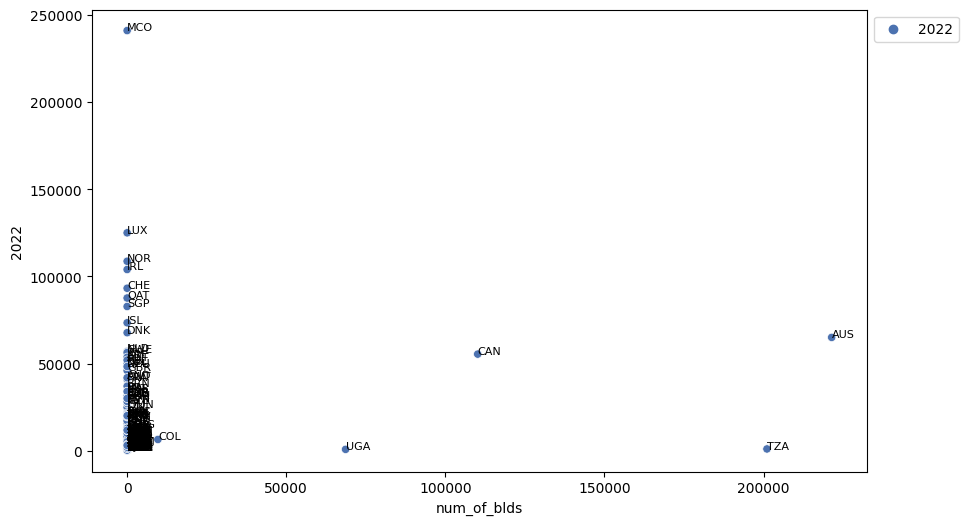

In [28]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# a scatter plot of the number of AI buildings and gdp for the year 2022
sns.scatterplot(data=df_ai_blds_gdp_2022, x="num_of_blds", y="2022", hue="blds_year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_gdp_2022)):
    try:
        plt.text(df_ai_blds_gdp_2022['num_of_blds'][i], df_ai_blds_gdp_2022['2022'][i], df_ai_blds_gdp_2022['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)   
        pass
    else:
        pass

# Set x-axis range
# plt.xlim(0, 1000000)  # Specify your desired range as x_min and x_max

plt.show()

#### 2. version of the scatterplot (GDP)
- more years of the data (2018–2022)
- x-axis: Microsoft AI buildings
- y-axis: selected indicator

In [29]:
# transform the data into needed composition
gdp_years = gdp.melt(id_vars=['Country Name', 'Country Code'], var_name='year', value_name='GDP')
gdp_years

,Country Name,Country Code,year,GDP
0,Aruba,ABW,2018,30918.483584
1,Africa Eastern and Southern,AFE,2018,1558.307482
2,Afghanistan,AFG,2018,492.090632
3,Africa Western and Central,AFW,2018,1735.374911
4,Angola,AGO,2018,2540.508878
...,...,...,...,...
1325,Kosovo,XKX,2022,5340.268798
1326,"Yemen, Rep.",YEM,2022,650.272218
1327,South Africa,ZAF,2022,6766.481254
1328,Zambia,ZMB,2022,1456.901570


In [30]:
# create id_year column in gdp_years df for merging
gdp_years['id_year'] = gdp_years['Country Code'] + gdp_years['year'].astype(str)
gdp_years

,Country Name,Country Code,year,GDP,id_year
0,Aruba,ABW,2018,30918.483584,ABW2018
1,Africa Eastern and Southern,AFE,2018,1558.307482,AFE2018
2,Afghanistan,AFG,2018,492.090632,AFG2018
3,Africa Western and Central,AFW,2018,1735.374911,AFW2018
4,Angola,AGO,2018,2540.508878,AGO2018
...,...,...,...,...,...
1325,Kosovo,XKX,2022,5340.268798,XKX2022
1326,"Yemen, Rep.",YEM,2022,650.272218,YEM2022
1327,South Africa,ZAF,2022,6766.481254,ZAF2022
1328,Zambia,ZMB,2022,1456.901570,ZMB2022


In [31]:
# create id_year column in df_blds_sel df for merging
df_blds_sel['id_year'] = df_blds_sel['adm0_iso'] + df_blds_sel['blds_year'].astype(str)

In [32]:
# merge the df_blds_sel and gdp_years
df_blds_gdp = pd.merge(df_blds_sel, gdp_years, on="id_year", how="left")

In [33]:
# reset the option to view all rows
pd.set_option('display.max_rows', None)

In [34]:
# set the option to view all rows
pd.reset_option('display.max_rows')

In [35]:
# check the dataframe
df_blds_gdp

,name_en,adm0_iso,blds_year,source,num_of_blds,id_year,Country Name,Country Code,year,GDP
0,Indonesia,IDN,2018,remainder,11987966.0,IDN2018,Indonesia,IDN,2018,3902.661676
1,Indonesia,IDN,2019,remainder,24924151.0,IDN2019,Indonesia,IDN,2019,4151.227554
2,Indonesia,IDN,2020,remainder,26423299.0,IDN2020,Indonesia,IDN,2020,3895.618152
3,Indonesia,IDN,2021,remainder,30570946.0,IDN2021,Indonesia,IDN,2021,4334.215983
4,Indonesia,IDN,2022,remainder,36251876.0,IDN2022,Indonesia,IDN,2022,4787.999308
...,...,...,...,...,...,...,...,...,...,...
3727,Scarborough Shoal,-99,2019,source=esri/Google_Africa_Buildings,0.0,-992019,NaN,NaN,NaN,NaN
3728,Scarborough Shoal,-99,2020,source=esri/Google_Africa_Buildings,0.0,-992020,NaN,NaN,NaN,NaN
3729,Scarborough Shoal,-99,2021,source=esri/Google_Africa_Buildings,0.0,-992021,NaN,NaN,NaN,NaN
3730,Scarborough Shoal,-99,2022,source=esri/Google_Africa_Buildings,0.0,-992022,NaN,NaN,NaN,NaN


In [36]:
# create the df with the manually mapped buildings and gdp data
df_mm_blds_gdp = df_blds_gdp.loc[(df_blds_gdp["source"] == "remainder")
                                 & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
                                 , :]

In [37]:
# create the df with the ai buildings and gdp data
df_ai_blds_gdp = df_blds_gdp.loc[(df_blds_gdp["source"] == "source=microsoft/BuildingFootprints")
                                 & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
                                 , :]

In [38]:
# check the columns
df_mm_blds_gdp.columns

Index(['name_en', 'adm0_iso', 'blds_year', 'source', 'num_of_blds', 'id_year',
       'Country Name', 'Country Code', 'year', 'GDP'],
      dtype='object')

In [39]:
df_ai_blds_gdp.loc[df_ai_blds_gdp['adm0_iso'] == 'FRA', :]

,name_en,adm0_iso,blds_year,source,num_of_blds,id_year,Country Name,Country Code,year,GDP
366,France,FRA,2018,source=microsoft/BuildingFootprints,0.0,FRA2018,France,FRA,2018,41557.854859
367,France,FRA,2019,source=microsoft/BuildingFootprints,0.0,FRA2019,France,FRA,2019,40494.898294
368,France,FRA,2020,source=microsoft/BuildingFootprints,0.0,FRA2020,France,FRA,2020,39179.744260
369,France,FRA,2021,source=microsoft/BuildingFootprints,0.0,FRA2021,France,FRA,2021,43671.308410
370,France,FRA,2022,source=microsoft/BuildingFootprints,0.0,FRA2022,France,FRA,2022,40886.253268
371,France,FRA,2023,source=microsoft/BuildingFootprints,2004.0,FRA2023,NaN,NaN,NaN,NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

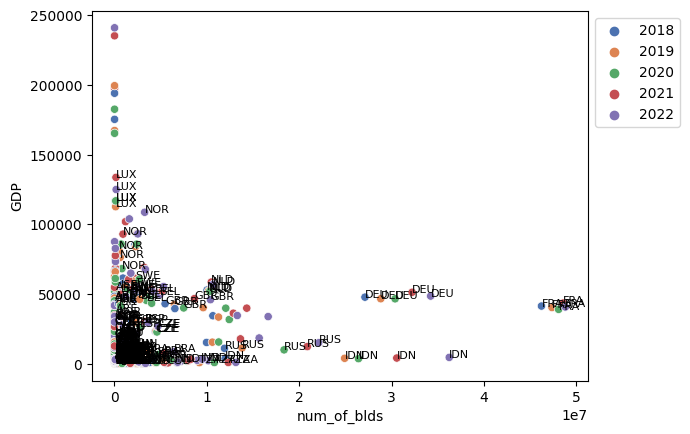

In [40]:
# the scatter plot of the number of manually mapped buildings and gdp in the years 2018-2022
sns.scatterplot(data=df_mm_blds_gdp, x="num_of_blds", y="GDP", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_mm_blds_gdp)):
    try:
        plt.text(df_mm_blds_gdp['num_of_blds'][i], df_mm_blds_gdp['GDP'][i], df_mm_blds_gdp['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.show()

In [41]:
# the scatter plot of the number of manually mapped buildings and gdp in the years 2018-2022
fig = px.scatter(df_mm_blds_gdp, x="num_of_blds", y="GDP", color="year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)
fig.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

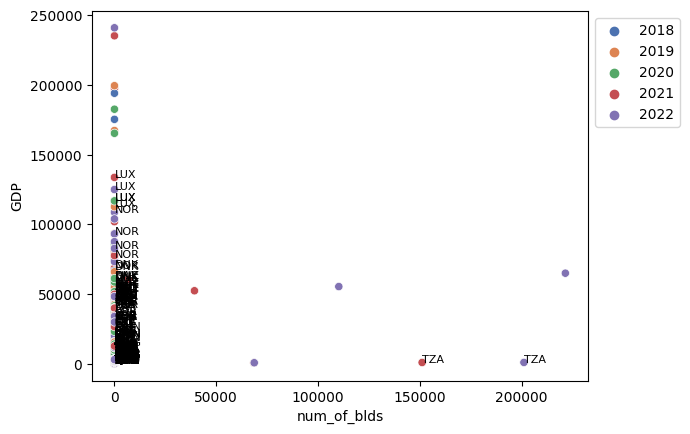

In [42]:
# the scatter plot of the number of ai buildings and gdp in the years 2018-2022
sns.scatterplot(data=df_ai_blds_gdp, x="num_of_blds", y="GDP", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_gdp)):
    try:
        plt.text(df_ai_blds_gdp['num_of_blds'][i], df_ai_blds_gdp['GDP'][i], df_ai_blds_gdp['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.show()

In [43]:
# the scatter plot of the number of ai buildings and gdp in the years 2018-2022
fig = px.scatter(df_ai_blds_gdp, x="num_of_blds", y="GDP", color="year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)
fig.show()

In [44]:
# check the number of countries with the number of ai buildings > 0 and without NaN values
temp_gdp = df_ai_blds_gdp.loc[(df_ai_blds_gdp["num_of_blds"] > 0)
                   & (pd.notna(df_ai_blds_gdp["num_of_blds"]))
                   & (pd.notna(df_ai_blds_gdp["GDP"])), :]

print(f'Number of countries: {len(temp_gdp)}')
temp_gdp

Number of countries: 22


,name_en,adm0_iso,blds_year,source,num_of_blds,id_year,Country Name,Country Code,year,GDP
64,Bolivia,BOL,2022,source=microsoft/BuildingFootprints,1454.0,BOL2022,Bolivia,BOL,2022,3600.121635
100,Argentina,ARG,2022,source=microsoft/BuildingFootprints,1469.0,ARG2022,Argentina,ARG,2022,13650.604629
279,Kenya,KEN,2021,source=microsoft/BuildingFootprints,12.0,KEN2021,Kenya,KEN,2021,2069.661129
280,Kenya,KEN,2022,source=microsoft/BuildingFootprints,59.0,KEN2022,Kenya,KEN,2022,2099.301938
297,Malawi,MWI,2021,source=microsoft/BuildingFootprints,9.0,MWI2021,Malawi,MWI,2021,633.609733
298,Malawi,MWI,2022,source=microsoft/BuildingFootprints,11.0,MWI2022,Malawi,MWI,2022,645.158692
315,Tanzania,TZA,2021,source=microsoft/BuildingFootprints,151091.0,TZA2021,Tanzania,TZA,2021,1146.031982
316,Tanzania,TZA,2022,source=microsoft/BuildingFootprints,201082.0,TZA2022,Tanzania,TZA,2022,1192.766479
550,Democratic Republic of the Congo,COD,2022,source=microsoft/BuildingFootprints,395.0,COD2022,"Congo, Dem. Rep.",COD,2022,653.656223
1720,Nigeria,NGA,2022,source=microsoft/BuildingFootprints,27.0,NGA2022,Nigeria,NGA,2022,2162.633734


### Buildings X HDI

#### 1. version of the scatterplot (HDI)
- one year of the data (2021)
- x-axis: Microsoft AI buildings
- y-axis: selected indicator

##### Transform the data

In [45]:
hdi

,iso3,country,hdicode,region,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,AFG,Afghanistan,Low,SA,0.483,0.488,0.483,0.478
1,AGO,Angola,Medium,SSA,0.595,0.595,0.590,0.586
2,ALB,Albania,High,ECA,0.806,0.810,0.794,0.796
3,AND,Andorra,Very High,NaN,0.872,0.873,0.848,0.858
4,ARE,United Arab Emirates,Very High,AS,0.909,0.920,0.912,0.911
...,...,...,...,...,...,...,...,...
201,ZZG.ECA,Europe and Central Asia,NaN,NaN,0.798,0.802,0.793,0.796
202,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,0.766,0.768,0.755,0.754
203,ZZI.SA,South Asia,NaN,NaN,0.640,0.641,0.638,0.632
204,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,0.547,0.552,0.549,0.547


In [46]:
# select the gdp data from the year 2022 and create the df
hdi_2021 = hdi[['country', 'iso3', 'hdi_2021']]
hdi_2021

,country,iso3,hdi_2021
0,Afghanistan,AFG,0.478
1,Angola,AGO,0.586
2,Albania,ALB,0.796
3,Andorra,AND,0.858
4,United Arab Emirates,ARE,0.911
...,...,...,...
201,Europe and Central Asia,ZZG.ECA,0.796
202,Latin America and the Caribbean,ZZH.LAC,0.754
203,South Asia,ZZI.SA,0.632
204,Sub-Saharan Africa,ZZJ.SSA,0.547


In [47]:
df_blds_sel

,name_en,adm0_iso,blds_year,source,num_of_blds,id_year
0,Indonesia,IDN,2018,remainder,11987966.0,IDN2018
1,Indonesia,IDN,2019,remainder,24924151.0,IDN2019
2,Indonesia,IDN,2020,remainder,26423299.0,IDN2020
3,Indonesia,IDN,2021,remainder,30570946.0,IDN2021
4,Indonesia,IDN,2022,remainder,36251876.0,IDN2022
...,...,...,...,...,...,...
3727,Scarborough Shoal,-99,2019,source=esri/Google_Africa_Buildings,0.0,-992019
3728,Scarborough Shoal,-99,2020,source=esri/Google_Africa_Buildings,0.0,-992020
3729,Scarborough Shoal,-99,2021,source=esri/Google_Africa_Buildings,0.0,-992021
3730,Scarborough Shoal,-99,2022,source=esri/Google_Africa_Buildings,0.0,-992022


In [48]:
# select the ai blds data from the year 2021 and create the df
ai_blds_2021 = df_blds_sel.loc[(df_blds_sel['blds_year'] == 2021)
           & (df_blds_sel['source'] == "source=microsoft/BuildingFootprints")
           & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
           , :]

In [49]:
# check the number of buildings by country in the year 2021
ai_blds_2021.groupby(['name_en', 'adm0_iso']).agg({'num_of_blds': 'sum'}).reset_index()

,name_en,adm0_iso,num_of_blds
0,Abkhazia,GEO,0.0
1,Afghanistan,AFG,0.0
2,Albania,ALB,0.0
3,Algeria,DZA,0.0
4,Andorra,AND,0.0
...,...,...,...
203,Wake Island,-99,0.0
204,Western Sahara,B28,0.0
205,Yemen,YEM,0.0
206,Zambia,ZMB,0.0


In [50]:
# check how many countries have buildings in the year 2022
len(ai_blds_2021.loc[~(ai_blds_2021['num_of_blds'] == 0), :])

8

In [51]:
# set the option to view all rows
pd.set_option('display.max_rows', None)

In [52]:
# reset the option to view all rows
pd.reset_option('display.max_rows')

In [53]:
# sort the ai_blds_2022 by name_en
ai_blds_2021.sort_values(by="name_en", ascending=True)

,name_en,adm0_iso,blds_year,source,num_of_blds,id_year
1053,Abkhazia,GEO,2021,source=microsoft/BuildingFootprints,0.0,GEO2021
2259,Afghanistan,AFG,2021,source=microsoft/BuildingFootprints,0.0,AFG2021
1089,Albania,ALB,2021,source=microsoft/BuildingFootprints,0.0,ALB2021
2115,Algeria,DZA,2021,source=microsoft/BuildingFootprints,0.0,DZA2021
2241,Andorra,AND,2021,source=microsoft/BuildingFootprints,0.0,AND2021
...,...,...,...,...,...,...
3687,Wake Island,-99,2021,source=microsoft/BuildingFootprints,0.0,-992021
477,Western Sahara,B28,2021,source=microsoft/BuildingFootprints,0.0,B282021
2811,Yemen,YEM,2021,source=microsoft/BuildingFootprints,0.0,YEM2021
1395,Zambia,ZMB,2021,source=microsoft/BuildingFootprints,0.0,ZMB2021


In [54]:
# merge the ai_blds_2021 and gdp_2021
df_ai_blds_hdi_2021 = ai_blds_2021.merge(hdi_2021, left_on="adm0_iso", right_on="iso3", how="left")

In [55]:
# check the columns
df_ai_blds_hdi_2021.columns

Index(['name_en', 'adm0_iso', 'blds_year', 'source', 'num_of_blds', 'id_year',
       'country', 'iso3', 'hdi_2021'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

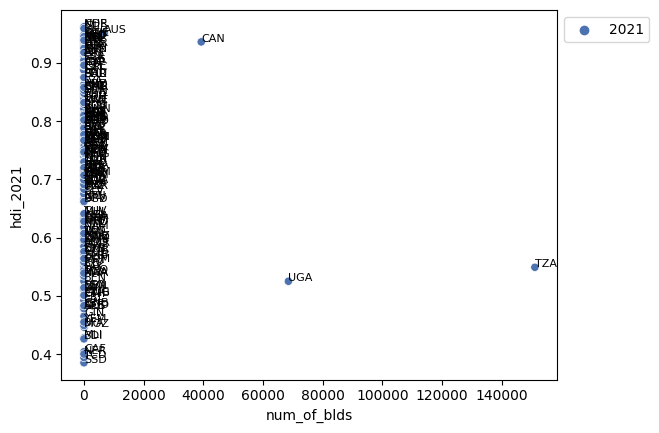

In [56]:
# Scatter plot of the number of AI buildings and HDI for the year 2021
sns.scatterplot(data=df_ai_blds_hdi_2021, x="num_of_blds", y="hdi_2021", hue="blds_year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_hdi_2021)):
    plt.text(df_ai_blds_hdi_2021['num_of_blds'][i], df_ai_blds_hdi_2021['hdi_2021'][i], df_ai_blds_hdi_2021['adm0_iso'][i], fontsize=8)

plt.show()

In [57]:
# Scatter plot of the number of AI buildings and HDI for the year 2021
fig = px.scatter(df_ai_blds_hdi_2021, x="num_of_blds", y="hdi_2021",
                 #color="blds_year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)
fig.show()

#### 2. version of the scatterplot (HDI)
- more years of the data (2018–2022)
- x-axis: Microsoft AI buildings
- y-axis: selected indicator

In [58]:
# transform the data into needed composition
hdi_years = hdi.melt(id_vars=['iso3', 'country', 'hdicode', 'region'], var_name='year', value_name='HDI')
hdi_years

,iso3,country,hdicode,region,year,HDI
0,AFG,Afghanistan,Low,SA,hdi_2018,0.483
1,AGO,Angola,Medium,SSA,hdi_2018,0.595
2,ALB,Albania,High,ECA,hdi_2018,0.806
3,AND,Andorra,Very High,NaN,hdi_2018,0.872
4,ARE,United Arab Emirates,Very High,AS,hdi_2018,0.909
...,...,...,...,...,...,...
819,ZZG.ECA,Europe and Central Asia,NaN,NaN,hdi_2021,0.796
820,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,hdi_2021,0.754
821,ZZI.SA,South Asia,NaN,NaN,hdi_2021,0.632
822,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,hdi_2021,0.547


In [59]:
# function extraction of the year from the year column
def year_extraction(row):
    return row['year'].split("_")[1]

# apply the function to the hdi_years df
hdi_years['year'] = hdi_years.apply(year_extraction, axis=1)

# convert col year from object data type to datetype
hdi_years['year'] = pd.to_datetime(hdi_years['year'], format='%Y').dt.year

In [60]:
hdi_years

,iso3,country,hdicode,region,year,HDI
0,AFG,Afghanistan,Low,SA,2018,0.483
1,AGO,Angola,Medium,SSA,2018,0.595
2,ALB,Albania,High,ECA,2018,0.806
3,AND,Andorra,Very High,NaN,2018,0.872
4,ARE,United Arab Emirates,Very High,AS,2018,0.909
...,...,...,...,...,...,...
819,ZZG.ECA,Europe and Central Asia,NaN,NaN,2021,0.796
820,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,2021,0.754
821,ZZI.SA,South Asia,NaN,NaN,2021,0.632
822,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,2021,0.547


In [61]:
hdi_years.dtypes

iso3        object
country     object
hdicode     object
region      object
year         int32
HDI        float64
dtype: object

In [62]:
# create id_year column in hdi_years df for merging
hdi_years['id_year'] = hdi_years['iso3'] + hdi_years['year'].astype(str)
hdi_years

,iso3,country,hdicode,region,year,HDI,id_year
0,AFG,Afghanistan,Low,SA,2018,0.483,AFG2018
1,AGO,Angola,Medium,SSA,2018,0.595,AGO2018
2,ALB,Albania,High,ECA,2018,0.806,ALB2018
3,AND,Andorra,Very High,NaN,2018,0.872,AND2018
4,ARE,United Arab Emirates,Very High,AS,2018,0.909,ARE2018
...,...,...,...,...,...,...,...
819,ZZG.ECA,Europe and Central Asia,NaN,NaN,2021,0.796,ZZG.ECA2021
820,ZZH.LAC,Latin America and the Caribbean,NaN,NaN,2021,0.754,ZZH.LAC2021
821,ZZI.SA,South Asia,NaN,NaN,2021,0.632,ZZI.SA2021
822,ZZJ.SSA,Sub-Saharan Africa,NaN,NaN,2021,0.547,ZZJ.SSA2021


In [63]:
# create id_year column in df_blds_sel df for merging
df_blds_sel['id_year'] = df_blds_sel['adm0_iso'] + df_blds_sel['blds_year'].astype(str)

In [64]:
# merge the df_blds_sel and gdp_years
df_blds_hdi = pd.merge(df_blds_sel, hdi_years, on="id_year", how="left")

In [65]:
# reset the option to view all rows
pd.set_option('display.max_rows', None)

In [66]:
# set the option to view all rows
pd.reset_option('display.max_rows')

In [67]:
# check the dataframe
df_blds_hdi

,name_en,adm0_iso,blds_year,source,num_of_blds,id_year,iso3,country,hdicode,region,year,HDI
0,Indonesia,IDN,2018,remainder,11987966.0,IDN2018,IDN,Indonesia,High,EAP,2018.0,0.710
1,Indonesia,IDN,2019,remainder,24924151.0,IDN2019,IDN,Indonesia,High,EAP,2019.0,0.716
2,Indonesia,IDN,2020,remainder,26423299.0,IDN2020,IDN,Indonesia,High,EAP,2020.0,0.709
3,Indonesia,IDN,2021,remainder,30570946.0,IDN2021,IDN,Indonesia,High,EAP,2021.0,0.705
4,Indonesia,IDN,2022,remainder,36251876.0,IDN2022,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3727,Scarborough Shoal,-99,2019,source=esri/Google_Africa_Buildings,0.0,-992019,NaN,NaN,NaN,NaN,NaN,NaN
3728,Scarborough Shoal,-99,2020,source=esri/Google_Africa_Buildings,0.0,-992020,NaN,NaN,NaN,NaN,NaN,NaN
3729,Scarborough Shoal,-99,2021,source=esri/Google_Africa_Buildings,0.0,-992021,NaN,NaN,NaN,NaN,NaN,NaN
3730,Scarborough Shoal,-99,2022,source=esri/Google_Africa_Buildings,0.0,-992022,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# create the df with the manually mapped buildings and gdp data
df_mm_blds_hdi = df_blds_hdi.loc[(df_blds_hdi["source"] == "remainder")
                                 & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
                                 , :]

In [69]:
# create the df with the ai buildings and gdp data
df_ai_blds_hdi = df_blds_hdi.loc[(df_blds_hdi["source"] == "source=microsoft/BuildingFootprints")
                                 & ~(df_blds_gdp['adm0_iso'] == 'USA') # exclude USA as a extreme value
                                 , :]

In [70]:
# check the columns
df_mm_blds_hdi.columns

Index(['name_en', 'adm0_iso', 'blds_year', 'source', 'num_of_blds', 'id_year',
       'iso3', 'country', 'hdicode', 'region', 'year', 'HDI'],
      dtype='object')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

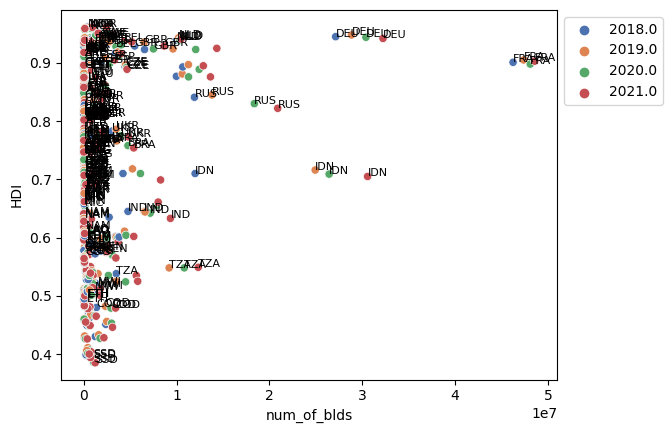

In [71]:
# the scatter plot of the number of manually mapped buildings and hdi in the years 2018-2022
sns.scatterplot(data=df_mm_blds_hdi, x="num_of_blds", y="HDI", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_mm_blds_hdi)):
    try:
        plt.text(df_mm_blds_hdi['num_of_blds'][i], df_mm_blds_hdi['HDI'][i], df_mm_blds_hdi['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.show()

In [73]:
# convert the year column to string
df_mm_blds_hdi.loc[: ,'year'] = df_mm_blds_hdi['year'].astype(str)

# the scatter plot of the number of manually mapped buildings and hdi in the years 2018-2022
fig = px.scatter(df_mm_blds_hdi, x="num_of_blds", y="HDI",
                 color="year",
                 #symbol="adm0_iso"
                 hover_name="adm0_iso",)
fig.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

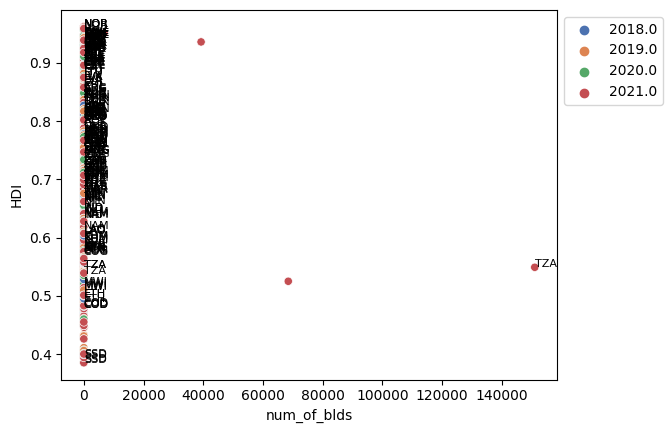

In [ ]:
# the scatter plot of the number of ai buildings and hdi in the years 2018-2022
sns.scatterplot(data=df_ai_blds_hdi, x="num_of_blds", y="HDI", hue="year", palette="deep")

# Move the legend to the upper right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate data points with labels
for i in range(len(df_ai_blds_hdi)):
    try:
        plt.text(df_ai_blds_hdi['num_of_blds'][i], df_ai_blds_hdi['HDI'][i], df_ai_blds_hdi['adm0_iso'][i], fontsize=8)
    except Exception as e:
        # print(e)
        pass
    else:
        pass

plt.show()

In [ ]:
# convert the year column to string
df_ai_blds_hdi.loc[:, 'year'] = df_ai_blds_hdi['year'].astype(str)

# the scatter plot of the number of manually mapped buildings and hdi in the years 2018-2022
fig = px.scatter(df_ai_blds_hdi, x="num_of_blds", y="HDI",
                 color="year",
                 hover_name="adm0_iso")
fig.show()


In [ ]:
# check the number of countries with the number of ai buildings > 0 and without NaN values
temp_hdi = df_ai_blds_hdi.loc[(df_ai_blds_hdi["num_of_blds"] > 0)
                   & (pd.notna(df_ai_blds_hdi["num_of_blds"]))
                   & (pd.notna(df_ai_blds_hdi["HDI"])), :]

print(f'Number of countries: {len(temp_hdi)}')
temp_hdi

Number of countries: 8


,name_en,adm0_iso,blds_year,source,num_of_blds,id_year,iso3,country,hdicode,region,year,HDI
279,Kenya,KEN,2021,source=microsoft/BuildingFootprints,12.0,KEN2021,KEN,Kenya,Medium,SSA,2021.0,0.575
297,Malawi,MWI,2021,source=microsoft/BuildingFootprints,9.0,MWI2021,MWI,Malawi,Low,SSA,2021.0,0.512
315,Tanzania,TZA,2021,source=microsoft/BuildingFootprints,151091.0,TZA2021,TZA,Tanzania (United Republic of),Low,SSA,2021.0,0.549
2133,Mozambique,MOZ,2021,source=microsoft/BuildingFootprints,65.0,MOZ2021,MOZ,Mozambique,Low,SSA,2021.0,0.446
2313,Uganda,UGA,2021,source=microsoft/BuildingFootprints,68507.0,UGA2021,UGA,Uganda,Low,SSA,2021.0,0.525
2685,Canada,CAN,2021,source=microsoft/BuildingFootprints,39290.0,CAN2021,CAN,Canada,Very High,NaN,2021.0,0.936
2703,Mexico,MEX,2021,source=microsoft/BuildingFootprints,94.0,MEX2021,MEX,Mexico,High,LAC,2021.0,0.758
3003,Australia,AUS,2021,source=microsoft/BuildingFootprints,6767.0,AUS2021,AUS,Australia,Very High,NaN,2021.0,0.951
